In [1]:
from nearline_helpers import *
import json
%jsroot on

Welcome to JupyROOT 6.26/10


In [2]:
runs = [
    # 306,
    305
]
t = r.TChain('tree')
for run in runs:
    t.Add(f"../bin/*run*{run}*root")
    # t.Add(f"../bin/*run*{run}*00000*root")
t.GetEntries()

446206

In [3]:
c = r.TCanvas()
t.Draw("integrals.integral>>h(100,0,10000)","","colz")
c.SetLogy()
c.Draw()

In [4]:
c = r.TCanvas()
t.Draw("integrals_calibrated.energy_calib","amcNum == 1","colz")
c.SetLogy()
c.Draw()

In [5]:
c = r.TCanvas()
t.Draw("integrals_calibrated.peak_time","amcNum == 1","colz")
# c.SetLogy()
c.Draw()

In [6]:
c = r.TCanvas()
t.Draw("integrals_calibrated.integration_window.first:integrals_calibrated.integration_window.second","amcNum == 1","colz")
# c.SetLogy()
c.Draw()

In [7]:
c = r.TCanvas()
t.Draw("integrals_calibrated.peak_time:integrals_calibrated.integral","amcNum == 1","colz")
# c.SetLogy()
c.Draw()

In [8]:
c = r.TCanvas()
t.Draw("integrals_calibrated.integral","amcNum == 1","")
t.Draw("integrals_calibrated.integral","integrals_calibrated.peak_time > 200 && integrals_calibrated.peak_time < 260 && amcNum == 1","same")
c.SetLogy()
c.Draw()

In [42]:
c = r.TCanvas()
t.Draw("integrals_calibrated.integral>>h(100,0,50)","amcNum == 1","colz")
c.SetLogy()
c.Draw()

In [10]:
# cut = "amcNum == 1 && @integrals.size() == 1 && integrals.amcNum == 1"
cut = "integrals.amcNum == 1"

hr = r.TH2D("h", "; Pulse Integral [Cosmic MeV]; Channel Number", 10000,0,200,5,0,5)
hr2 = r.TH3D("h2", "; Pulse Integral [Cosmic MeV]; Amplitude [ADC Counts/4.096 -> mV]; Channel Number", 1000,0,400, 1000,0,1000,5,0,5)
t.Draw("integrals_calibrated.channelTag:integrals_calibrated.integral>>h", cut,"goff")
t.Draw("integrals_calibrated.channelTag:integrals_calibrated.amplitude/4.096:integrals_calibrated.integral>>h2", cut,"goff")
h = uproot.from_pyroot(hr).to_hist()
h2 = uproot.from_pyroot(hr2).to_hist()
h

Hist(
  Regular(10000, 0, 200, name=<TString 'xaxis' at 0x7fa2e0154dd0>, label=<TString ' Pulse Integral [Cosmic MeV]' at 0x7fa2e0154b50>),
  Regular(5, 0, 5, name=<TString 'yaxis' at 0x7fa2e01545d0>, label=<TString ' Channel Number' at 0x7fa2e0154d50>),
  storage=Double()) # Sum: 1968476.0 (2230965.0 with flow)

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


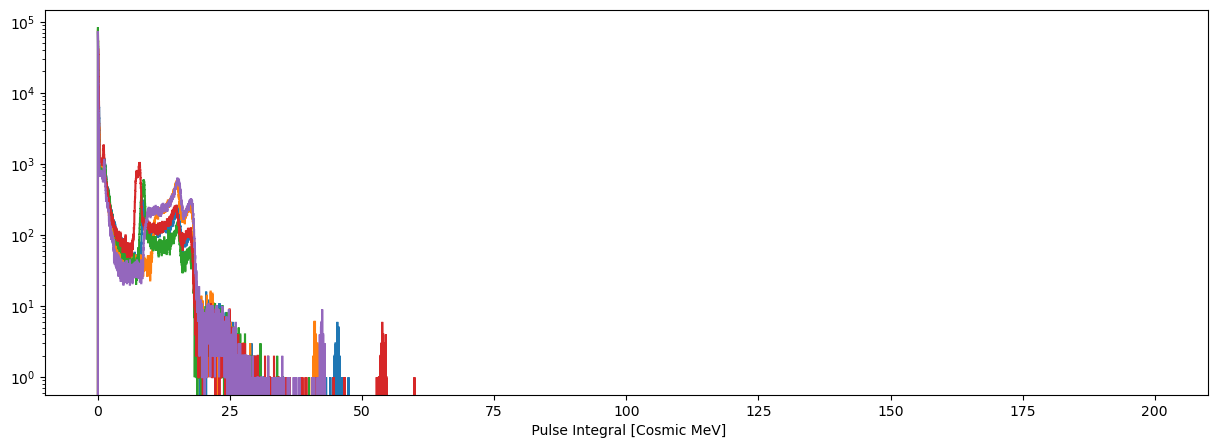

In [44]:
fig,ax = plt.subplots(figsize=(15,5))
h.stack(1).plot(yerr=False)
# plt.xlim(0,30)
plt.yscale("log")
plt.show()

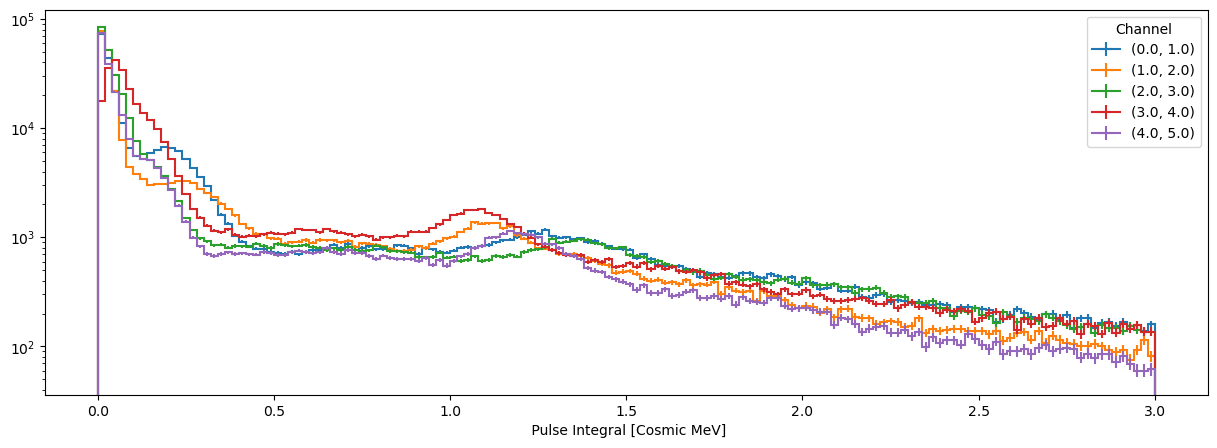

In [12]:
fig,ax = plt.subplots(figsize=(15,5))
h[:3j,:].stack(1).plot()
# plt.xlim(0,3)
plt.yscale("log")
plt.legend(title='Channel')
plt.show()

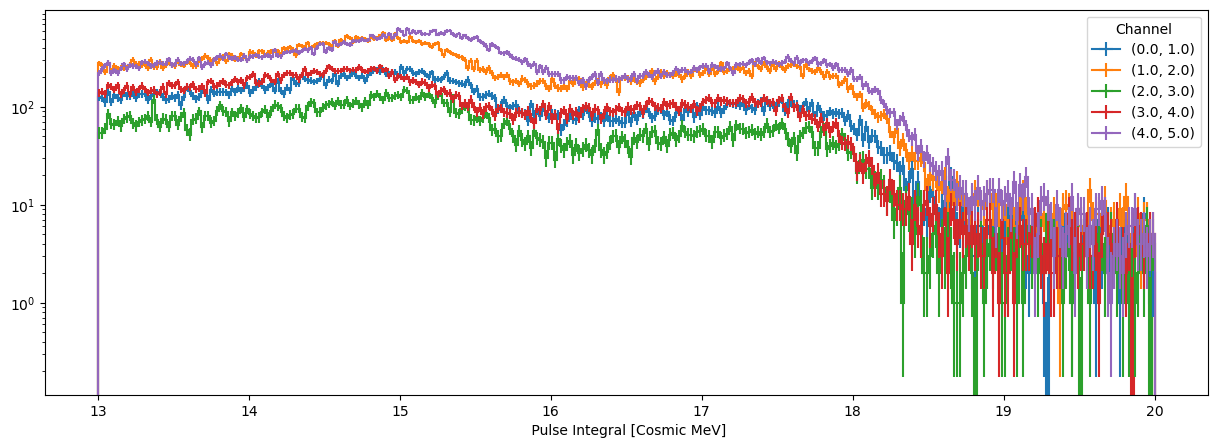

In [45]:
fig,ax = plt.subplots(figsize=(15,5))
h[13j:20j,:].stack(1).plot()
# plt.xlim(0,3)
plt.yscale("log")
plt.legend(title='Channel')
plt.show()

In [13]:
htot = h[:,0j].copy()
htot.reset()

Hist(Regular(10000, 0, 200, name=<TString 'xaxis' at 0x7fa2b17c5750>, label=<TString ' Pulse Integral [Cosmic MeV]' at 0x7fa2b17c6250>), storage=Double())

In [14]:
h3 = hist.Hist(
    # hist.axes.IntCategory(range(5),label='Channel Number'),
    hist.axes.Regular(500,0,100,label='Energy of Maximum Xtal'),
    hist.axes.Regular(500,0,100,label='Energy of All Xtals')
)

/home/jlab/miniconda3/envs/gm2_11/lib/python3.11/site-packages/hist/__init__.py:58: UserWarning: Misspelling error, 'axes' should be 'axis'
  warnings.warn(msg)


In [15]:
htot.reset()
for i,e in enumerate(t):
    energies_raw = np.array([wfi.integral for wfi in e.integrals_calibrated if wfi.amcNum == 1])
    windows = np.array([wfi.integration_window.first for wfi in e.integrals_calibrated if wfi.amcNum == 1])
    cut = (windows > 190) & (windows < 240) & (energies_raw > 6)
    energies = energies_raw[cut]
    # energies = energies_raw
    # print(energies_raw,windows,cut, energies)

    if np.any(energies > 10):
        # print(energies)
        # plot_event(e.integrals_calibrated)
        htot.fill(np.sum(energies))
        h3.fill(np.amax(energies), np.sum(energies))
        # plt.show()
    # if(i > 5):
    #     break
htot

Hist(Regular(10000, 0, 200, name=<TString 'xaxis' at 0x7fa2b17c5750>, label=<TString ' Pulse Integral [Cosmic MeV]' at 0x7fa2b17c6250>), storage=Double()) # Sum: 350465.0 (350488.0 with flow)

In [16]:
htot2 = htot.copy()

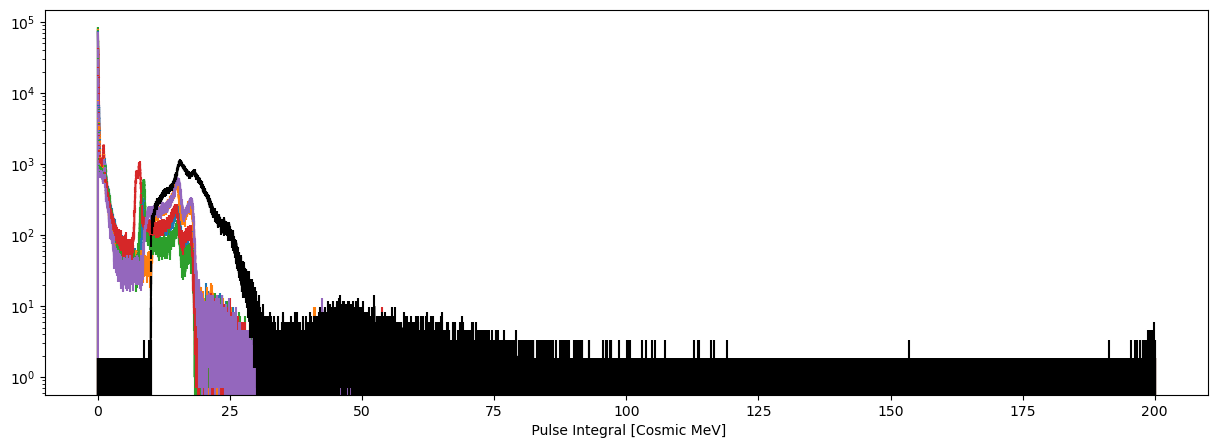

In [17]:
fig,ax = plt.subplots(figsize=(15,5))
h.stack(1).plot()
htot.plot(color='black')
# plt.xlim(0,30)
plt.yscale("log")
plt.show()

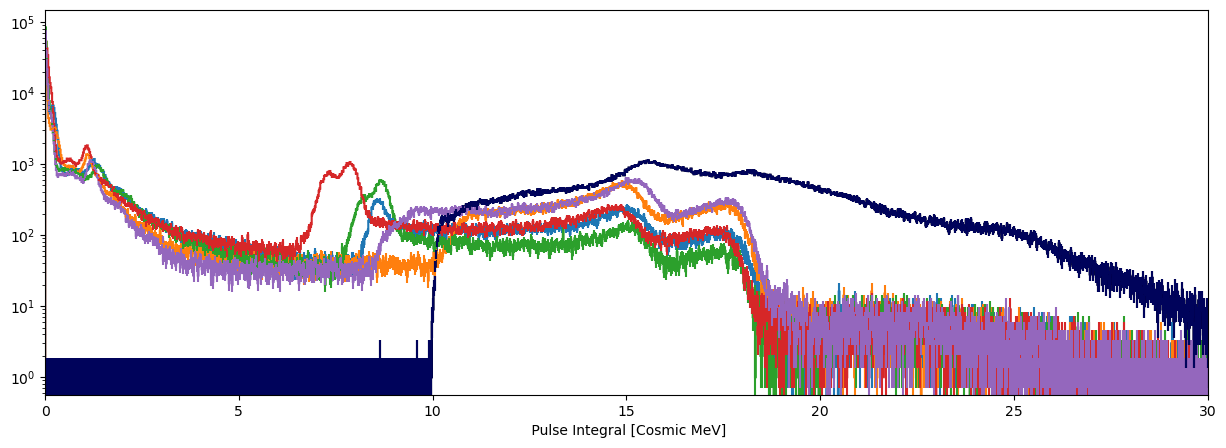

In [18]:
fig,ax = plt.subplots(figsize=(15,5))
h.stack(1).plot()
htot.plot(color='black')
htot2.plot(color='xkcd:dark blue')
plt.xlim(0,30)
plt.yscale("log")
plt.show()

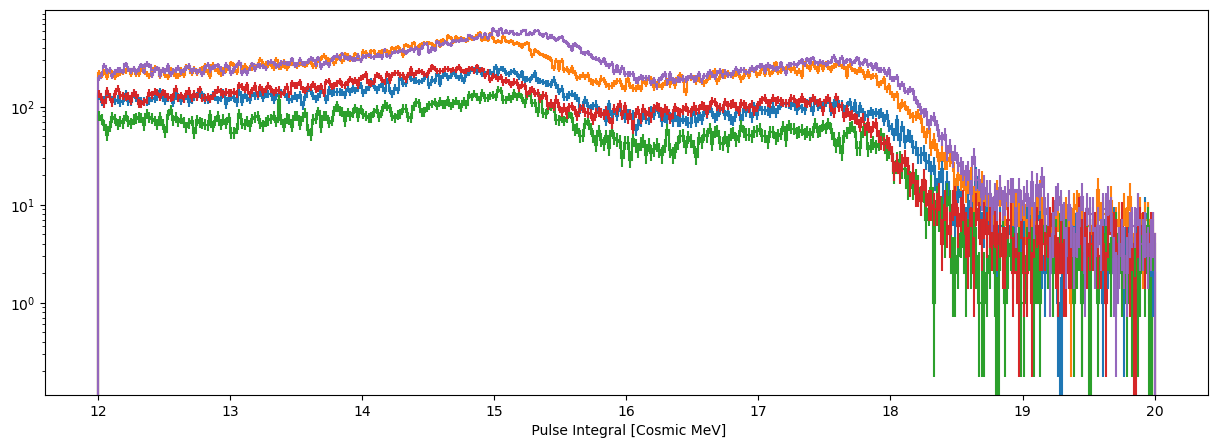

In [46]:
fig,ax = plt.subplots(figsize=(15,5))
h[12j:20j,:].stack(1).plot()
# htot.plot(color='black')
# htot2.plot(color='xkcd:dark blue')
# plt.xlim(0,30)
plt.yscale("log")
plt.show()

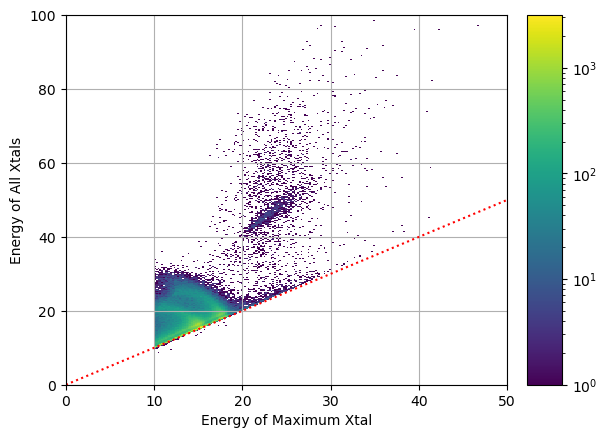

In [19]:
h3[:50j,:100j].plot(
    norm=matplotlib.colors.LogNorm(vmin=1)
)
plt.plot([0,50],[0,50],'r:')
# plt.ylim()
# plt.xlim()
plt.grid()
plt.show()

In [20]:
channel_map = {
    0:'B',
    1:'C',
    2:'E',
    3:'F',
    4:'G',
}
layout_string = '.AABBCC.\nDDEEFFGG\n.HHIIJJ.'

In [ ]:
def plot_event(integrals,channel_map=channel_map,layout=layout_string):
    # fig,ax = plt.subplots(2,3,figsize=(15,7))
    fig,ax = plt.subplot_mosaic(layout,figsize=(15,10), sharex=True, sharey=True)
    energy = 0
    for inti in integrals:
        if(inti.amcNum != 1):
            continue
        channel = inti.channelTag
        axi = ax[channel_map[channel]]
        plot_integral(inti, axi)
        axi.set_title(f'AMC {inti.amcNum} | Channel {channel}')
        energy += inti.integral
    plt.suptitle(f'Total integral: {energy:.2f}')
    plt.tight_layout()
    # plt.show()
    return fig,ax

In [21]:
c = r.TCanvas()
t.Draw("integrals_calibrated.integration_window.first:integrals_calibrated.integral","integrals_calibrated.amcNum == 1","colz")
# c.SetLogy()
c.SetGrid()
c.Draw()

In [22]:
c = r.TCanvas()
t.Draw("integrals_calibrated.integration_window.first>>hist(100,150,250)","","")
c.SetLogy()
c.SetGrid()
c.Draw()

0 [ 1.33385953e-01  1.24366213e+01 -2.29993660e-02  1.13398369e+00
  2.91522273e-02 -3.00000000e+01  1.80000000e+01 -1.53000000e+02
  4.30000000e+01 -8.60000000e+01]


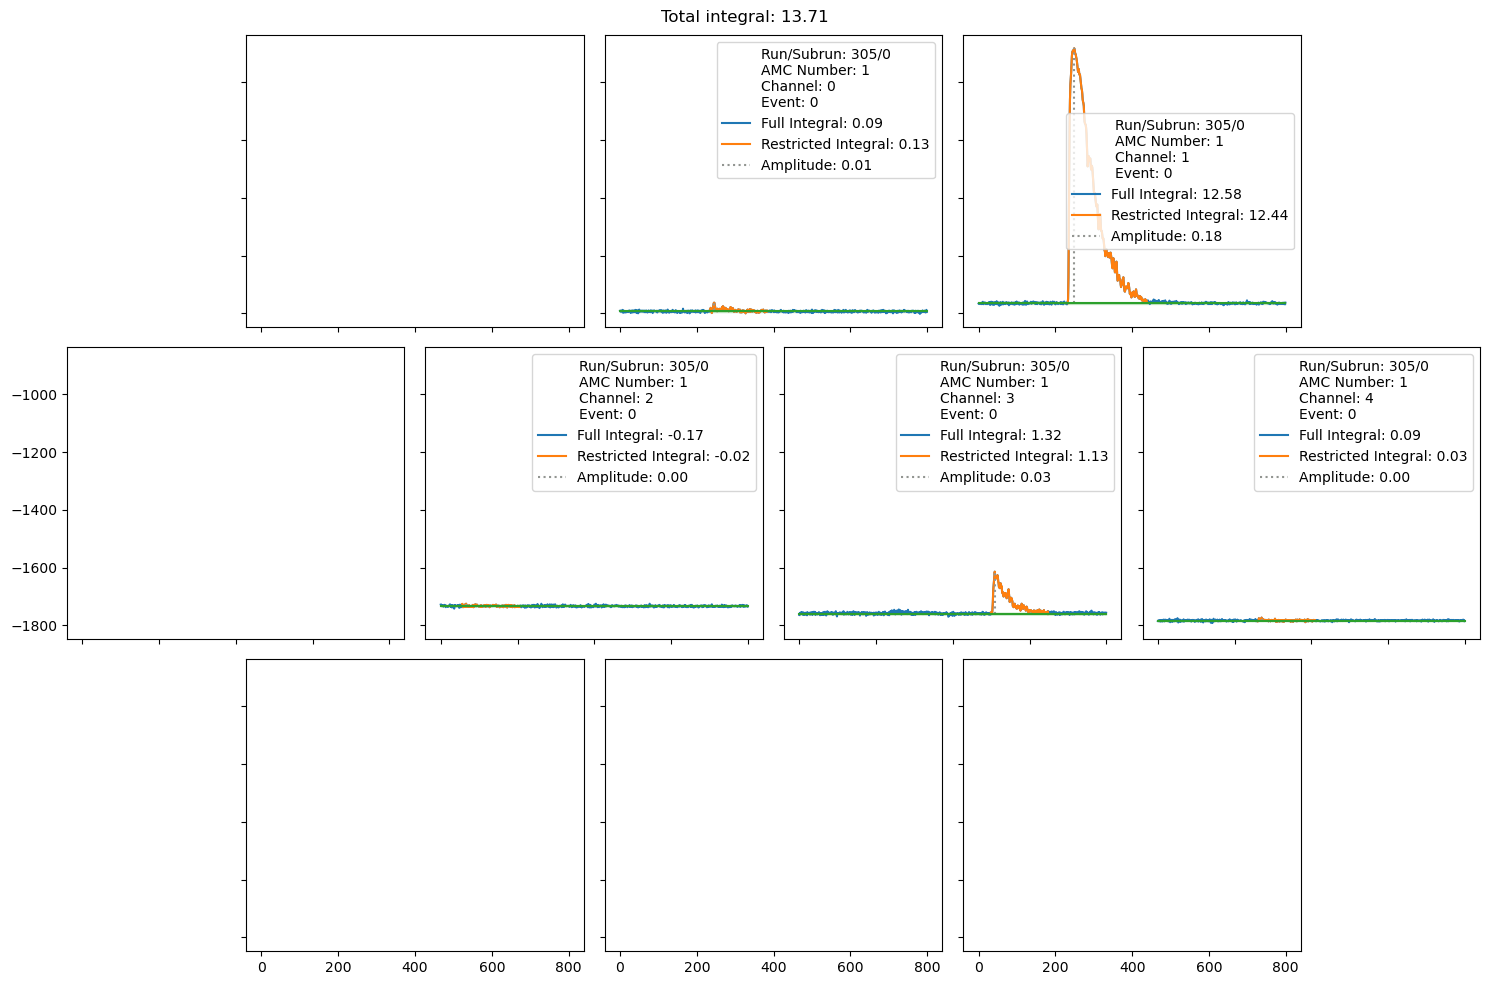

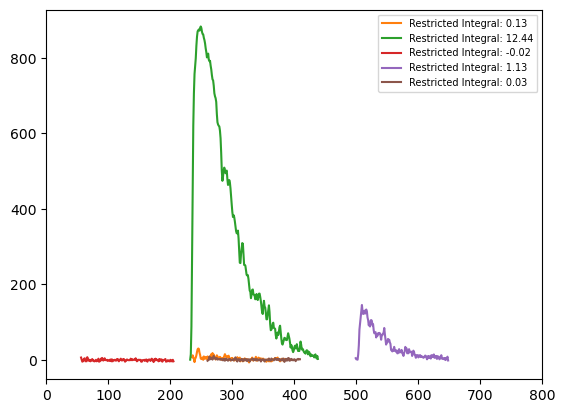

1 [-1.34488316e-02  3.73998073e-02  1.41403509e-01  7.36283464e+00
  1.68732465e+01 -1.30000000e+01 -1.52000000e+02  4.00000000e+00
  5.40000000e+01 -2.40000000e+01]


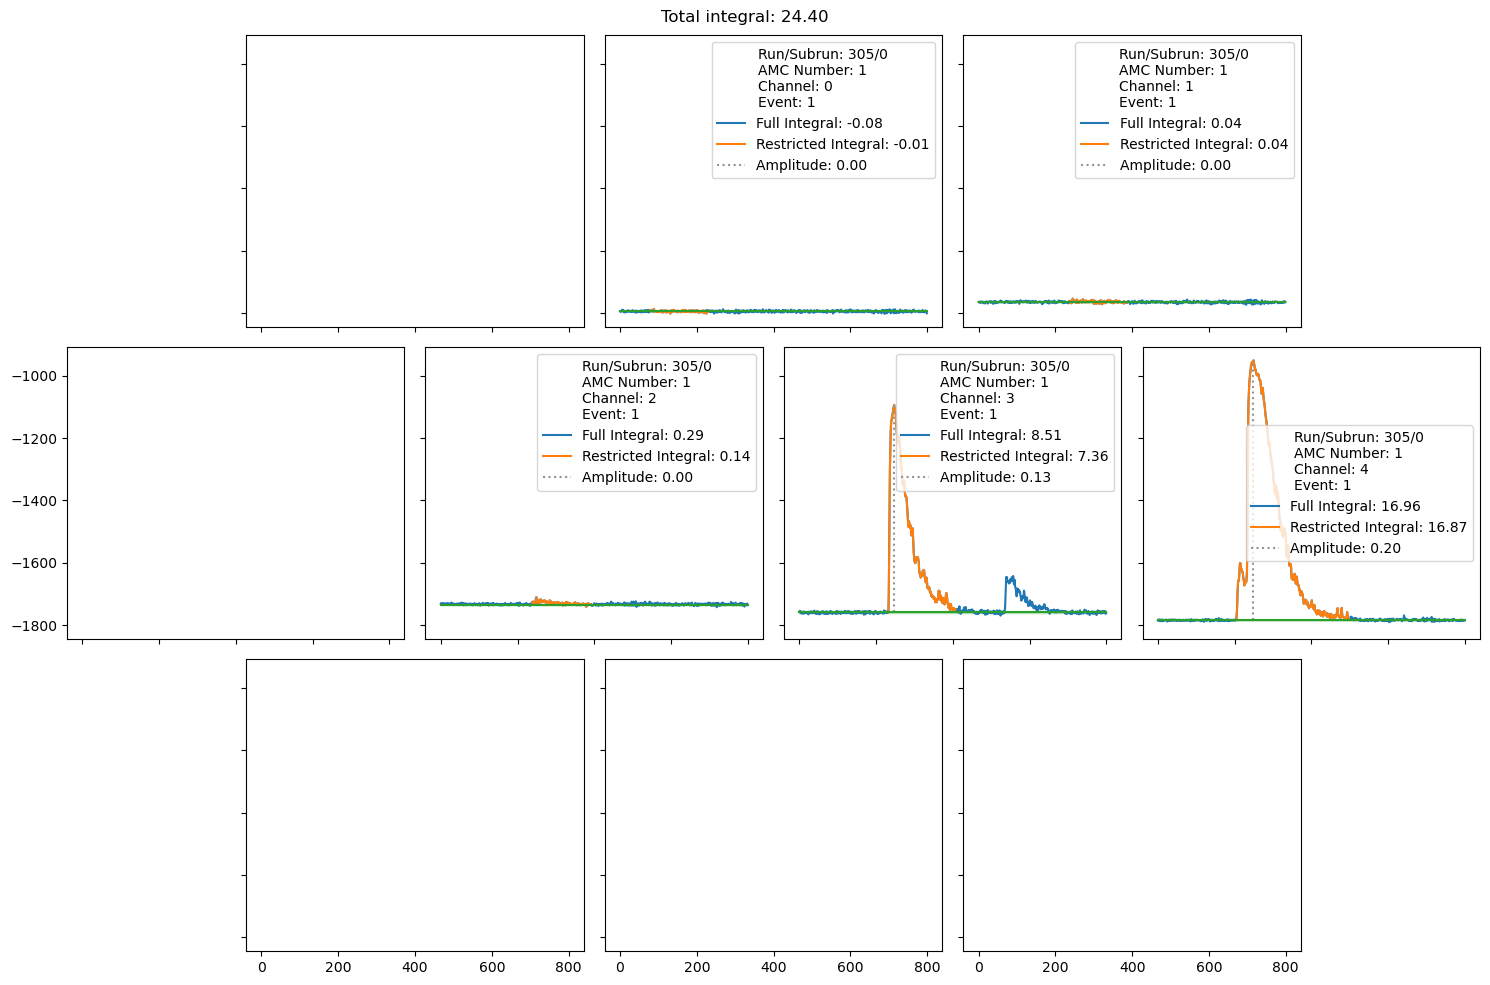

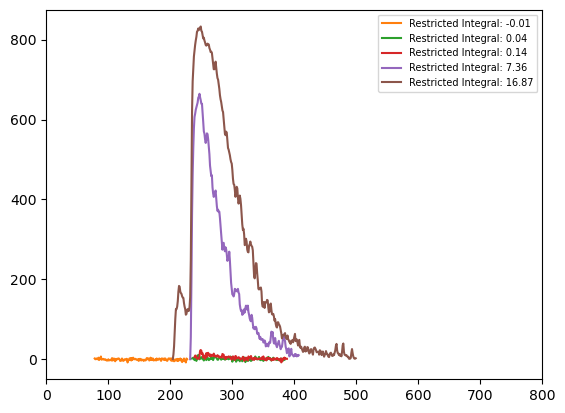

In [37]:
for i,e in enumerate(t):
    energies = np.array([wfi.integral for wfi in e.integrals_calibrated])
    if np.any(energies > 14):
        print(i, energies)
        plot_event(e.integrals_calibrated)
        # htot.fill(np.sum(energies))
        plt.show()
        fig,ax = plt.subplots()
        for inti in e.integrals_calibrated:
            if inti.amcNum != 1:
                continue
            plot_integral(inti,ax=ax, subtract_pedestal=True, plot_full=False, plot_pedestal=False,
                            plot_amplitude=False, color_offset=inti.channelTag
            )
        ax.legend(fontsize=7)
        plt.xlim(0,800)
        # plt.ylim(0,100)
        plt.show()
    if(i > 0):
        break

In [24]:
e.integrals_calibrated[0].integration_window[1]

386

---

[ 0.13338595 12.43662127 -0.02299937  1.13398369  0.02915223]


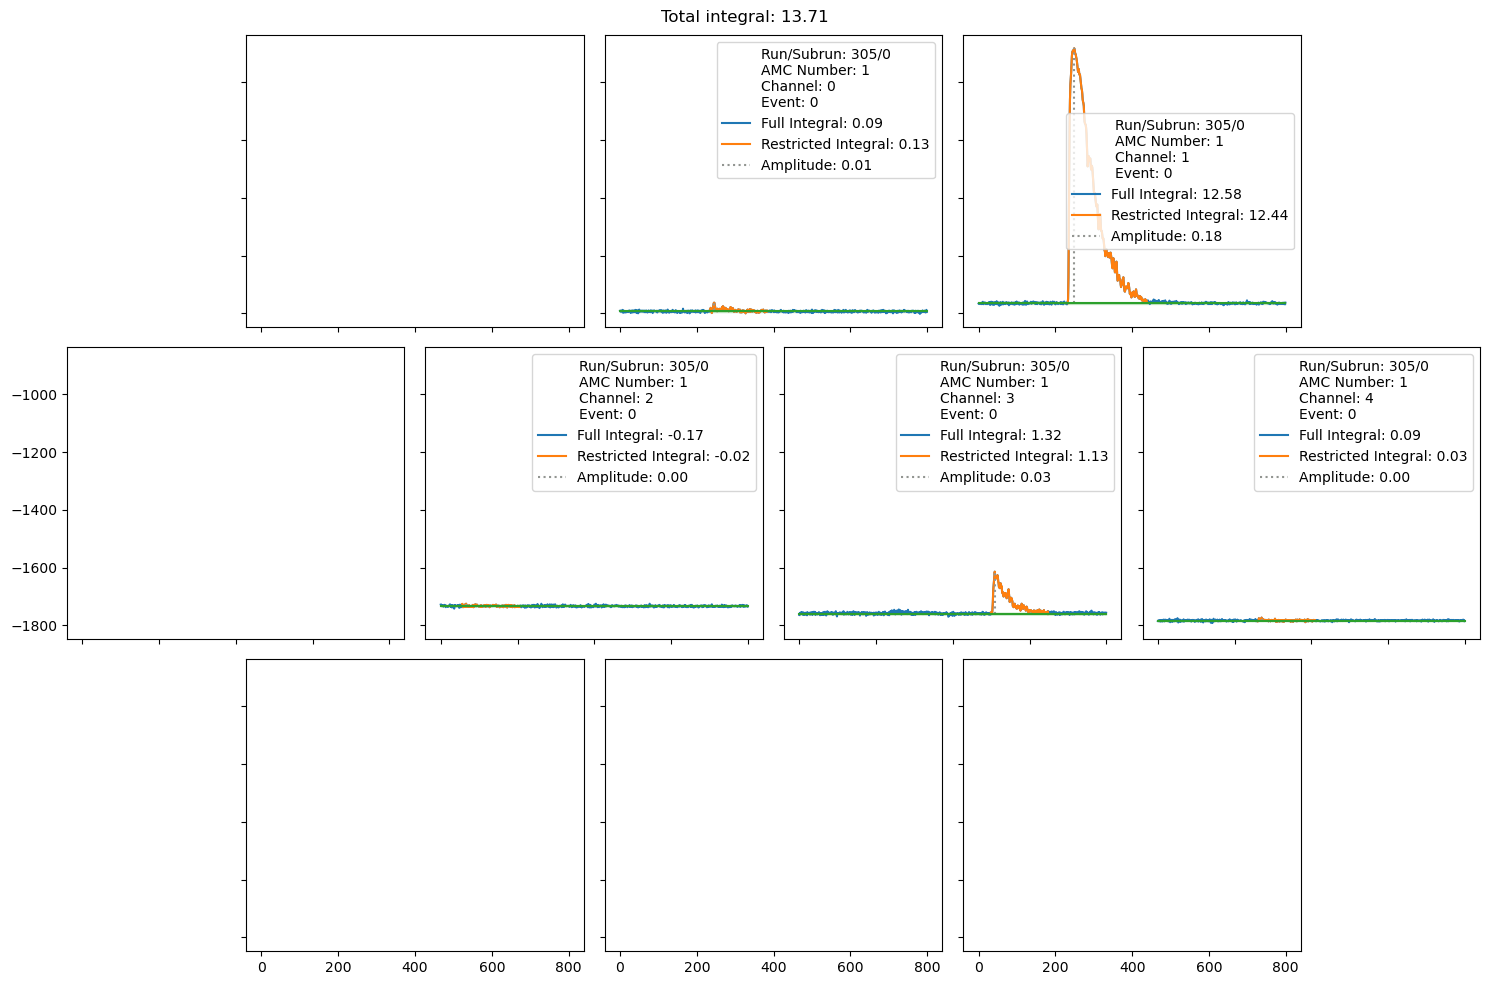

[-1.34488316e-02  3.73998073e-02  1.41403509e-01  7.36283464e+00
  1.68732465e+01]


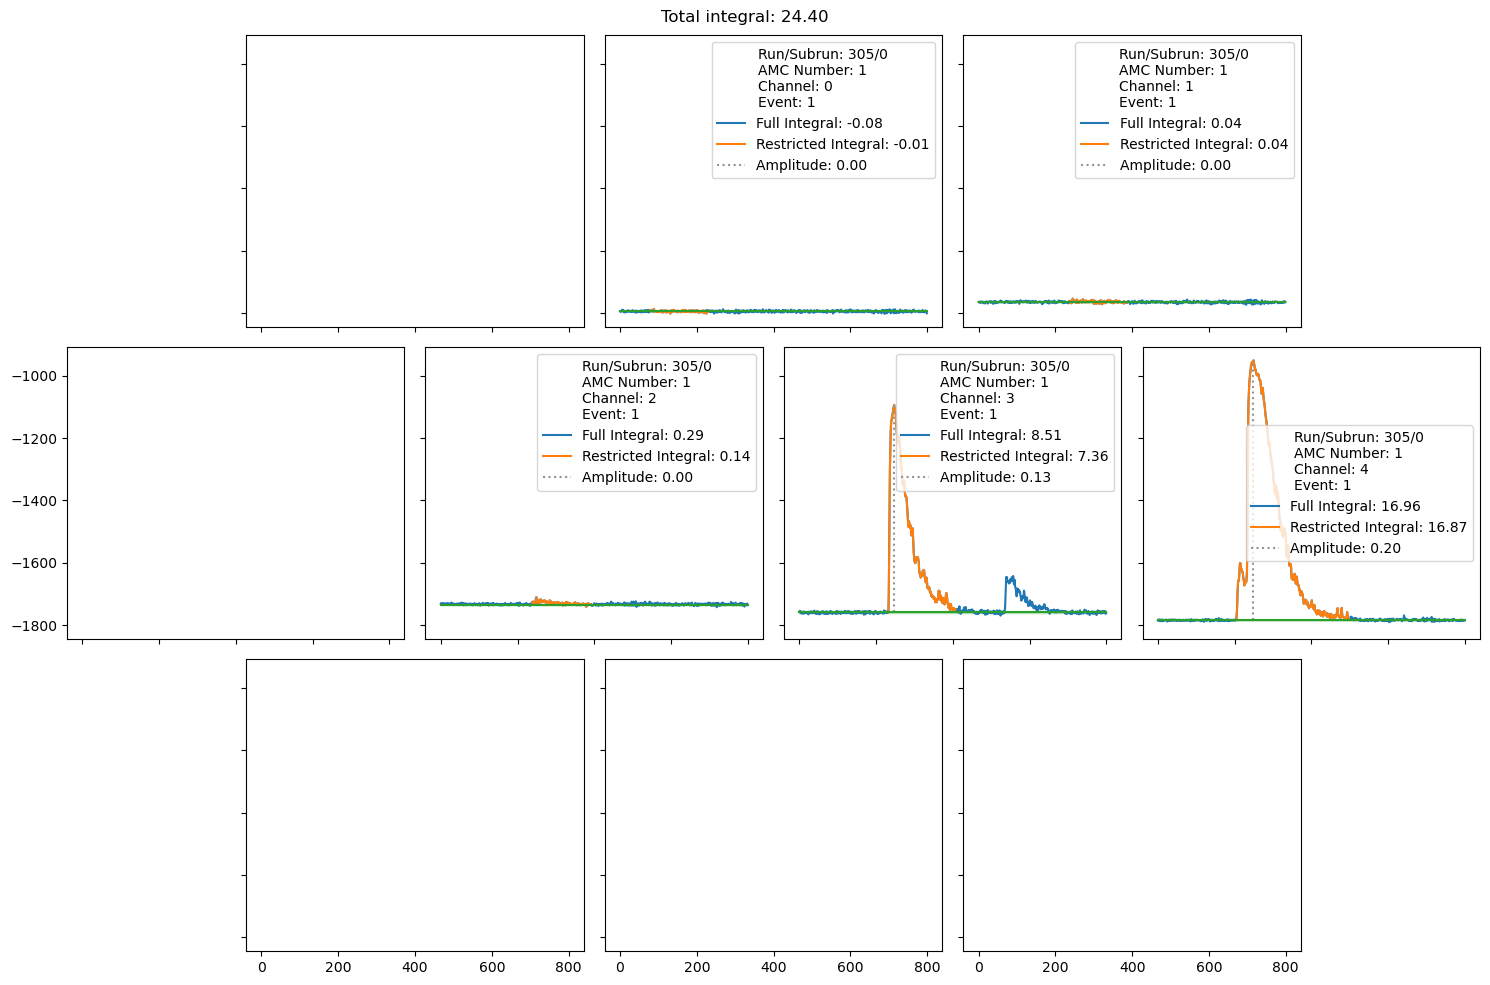

In [25]:
counter = 0
for i, e in enumerate(t):
    energies = np.array([wfi.integral for wfi in e.integrals_calibrated if wfi.amcNum == 1])
    # if np.any((energies > 14) & (energies < 18)) and np.sum(energies) > 30:
    if np.any((energies > 10) & (energies < 20)):
        print(energies)
        counter += 1
        plot_event(e.integrals_calibrated)
        plt.show()=
    if(counter > 1):
        break


In [32]:
def plot_integral(w,ax=None,subtract_pedestal=False,color_offset=0,plot_amplitude=True, plot_restricted=True, plot_pedestal=True, plot_full=True ):
    if(ax is None):
        fig,ax = plt.subplots()
    else:
        fig = plt.gcf()
    plt.sca(ax)
        
    wf = w.raw.GetObject()
    offset = w.pedestalLevel if subtract_pedestal else 0.0
    trace = np.array(wf.trace, dtype=float) - offset
    samples = range(len(trace))
    peak_location = samples[list(trace).index(np.amax(trace))]
    ped = np.full_like(samples, wf.pedestalLevel, dtype=float)-offset
    if(plot_full):
        plt.plot(samples,trace,color=f'C{color_offset+0}', label=f'Full Integral: {w.fullintegral:.2f}')
    if(plot_restricted):
        cut = np.full_like(trace, False)
        cut[w.integration_window.first:w.integration_window.second] = True
        plt.plot(samples,np.where(cut, trace, np.nan), color=f'C{color_offset+1}', label=f'CH{wfi.channelTag}: Restricted Integral: {w.integral:.2f}')
    if(plot_amplitude):
        plt.plot([peak_location, peak_location], [wf.pedestalLevel-offset, np.amax(trace)], ':', color='xkcd:grey', label=f'Amplitude: {w.amplitude:.2f}')
    if(plot_pedestal):
        plt.plot(samples,ped, color=f'C{color_offset+2}')
        plt.fill_between(samples, ped-wf.pedestalStdev, ped+wf.pedestalStdev, alpha=0.2, color=f'C{color_offset+2}')
    title = f'Run/Subrun: {wf.runNum}/{wf.subRunNum}\nAMC Number: {wf.amcNum}\nChannel: {wf.channelTag}\nEvent: {wf.eventNum}'
    plt.legend(title=title)
    # plt.show()
    return fig,ax

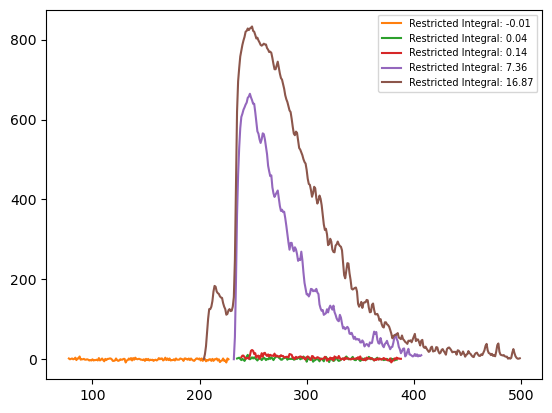

In [35]:
fig,ax = plt.subplots()
for inti in e.integrals_calibrated:
    if inti.amcNum != 1:
        continue
    plot_integral(inti,ax=ax, subtract_pedestal=True, plot_full=False, plot_pedestal=False,plot_amplitude=False, color_offset=inti.channelTag)
ax.legend(fontsize=7)
# plt.ylim(0,100)
plt.show()

-296


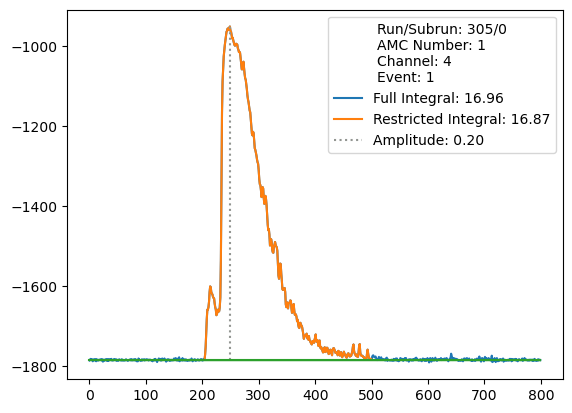

In [27]:
inti = e.integrals_calibrated[4]
plot_integral(inti)
print(inti.integration_window.first-inti.integration_window.second)
plt.show()